<a href="https://colab.research.google.com/github/harshk-0711/Automatic-defect-detection-/blob/main/cnn_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dimensions of our images.
img_width, img_height = 128, 128

train_data_dir = '/content/drive/MyDrive/Defectdetection/Train_cropped'
validation_data_dir = '/content/drive/MyDrive/Defectdetection/Test_cropped'
nb_train_samples = 115
nb_validation_samples = 48
epochs = 10
batch_size = 16

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 115 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples / batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples / batch_size)

<ipython-input-10-b9ae2fb5d0ba>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 65s 9s/step - loss: 0.6927 - accuracy: 0.6000 - val_loss: 0.6649 - val_accuracy: 0.5833
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.6469 - accuracy: 0.5913 - val_loss: 0.6363 - val_accuracy: 0.5833
Epoch 3/10
7/7 [==============================] - 6s 720ms/step - loss: 0.6014 - accuracy: 0.6696 - val_loss: 0.5818 - val_accuracy: 0.5833
Epoch 4/10
7/7 [==============================] - 6s 894ms/step - loss: 0.5881 - accuracy: 0.6783 - val_loss: 0.5196 - val_accuracy: 0.8333
Epoch 5/10
7/7 [==============================] - 5s 719ms/step - loss: 0.6149 - accuracy: 0.6609 - val_loss: 0.4343 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 6s 918ms/step - loss: 0.4702 - accuracy: 0.7913 - val_loss: 0.3188 - val_accuracy: 0.9375
Epoch 7/10
7/7 [==============================] - 5s 721ms/step - loss: 0.4070 - accuracy: 0.8174 - val_loss: 0.2602 - val_accuracy: 0.9583
Epoch 8/10
7/7 [========

In [ ]:
model.save('cnn_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


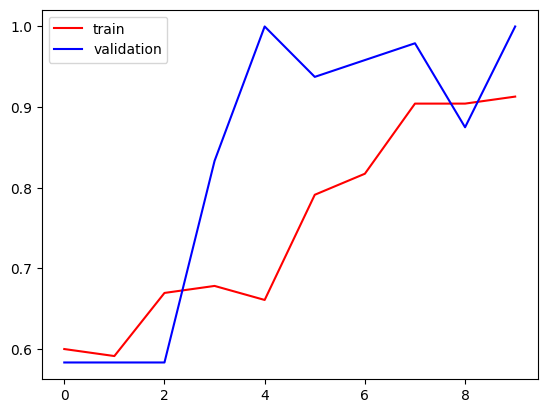

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

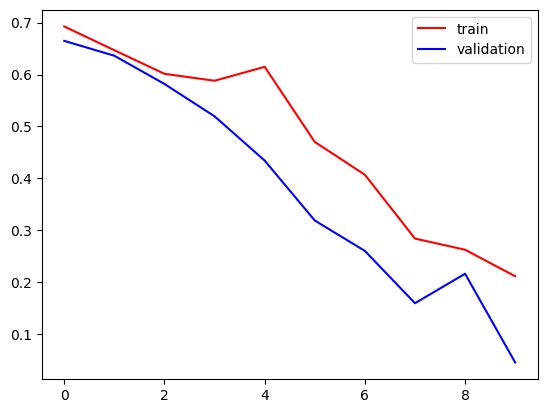

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
f = files.upload()

Saving test.jpg to test.jpg


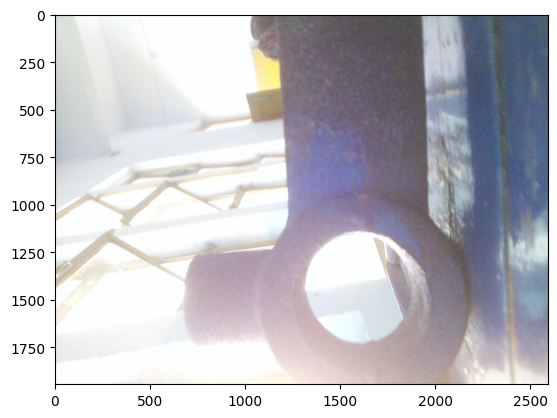

In [ ]:
test_img = cv2.imread('/content/test.jpg')
plt.imshow(test_img)

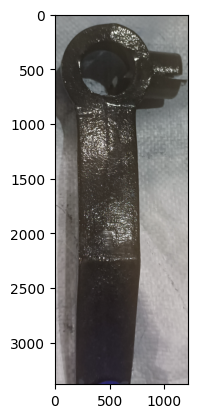

In [ ]:
import cv2
test_img = cv2.imread('/content/drive/MyDrive/Defectdetection/Test_cropped/Undefected/Copy of 1697377024667.jpg')
plt.imshow(test_img)


In [ ]:
test_img.shape

(3379, 1221, 3)

In [ ]:
test_img = cv2.resize(test_img,(128,128))

In [ ]:
test_input = test_img.reshape((1,128,128,3))

In [ ]:
y = model.predict(test_input)

1/1 [==============================] - 0s 331ms/step


In [ ]:
if(y < 0.5):
  print(float(y))
  print("THE PART IS DEFECTED, RED LIGHT WILL GLOW, HENCE DISCARDED")
else:
    print(float(y))
    print(y)
    print(" THE PART IS UNDEFECTED, GREEN LIGHT WILL GLOW, HENCE ACCEPTED")

1.0
[[1.]]
 THE PART IS UNDEFECTED, GREEN LIGHT WILL NOT GLOW, HENCE ACCEPTED


<ipython-input-21-91b8dfa64d99>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(y))


In [ ]:
pip install tensorflow-model-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Load the saved model
model = keras.models.load_model('/content/cnn_model2.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the quantized model to disk
with open('optimized_model.tflite', 'wb') as f:
    f.write(tflite_quantized_model)
